# Setup

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# The St Petersburg Paradox

Here's the simulation of the St. Petersburg game:

- Each game simulates repeated fair coin tosses until a head appears.
- The payout is $ X = 2^N $, where $N \sim Geom(1/2) $ is the toss on which the first head occurs.
- Despite the *infinite expected value*, the **empirical average payout** remains quite modest, even after 10,000 games.

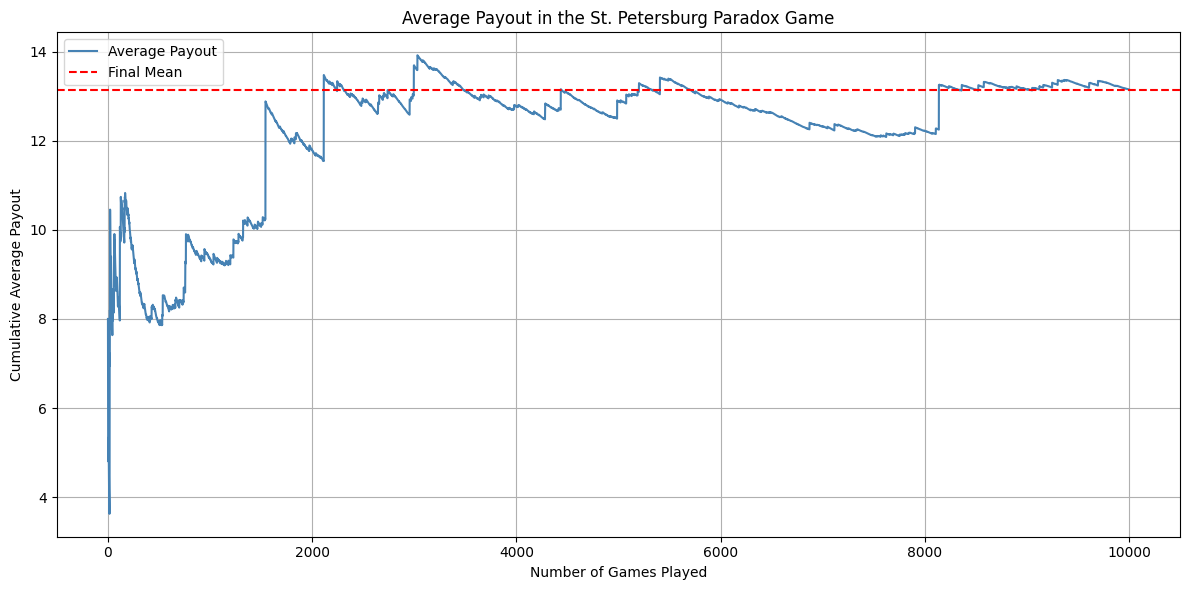

In [ ]:
# Simulation parameters
num_trials = 10000  # number of games played
max_payout = 1e6    # cap on payout to avoid overflow

# Simulate St. Petersburg game
def st_petersburg_game():
    tosses = 1
    while np.random.rand() > 0.5:
        tosses += 1
    return min(2 ** tosses, max_payout)

# Run simulations
payouts = np.array([st_petersburg_game() for _ in range(num_trials)])
cumulative_averages = np.cumsum(payouts) / (np.arange(num_trials) + 1)


# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(cumulative_averages, label="Average Payout", color='steelblue')
plt.axhline(y=np.mean(payouts), color='red', linestyle='--', label='Final Mean')
plt.title("Average Payout in the St. Petersburg Paradox Game")
plt.xlabel("Number of Games Played")
plt.ylabel("Cumulative Average Payout")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Geometric Payoff

Suppose the payoff is $X = N$ where $N \sim Geom(p)$. The growth of the payoff now becomes linear and both the expected value and variance are finite, $1/p$ and $\frac{1-p}{p^2}$ respectively. Therefore the LLN and CLT are applicable and the sample mean and normal convergence hold.

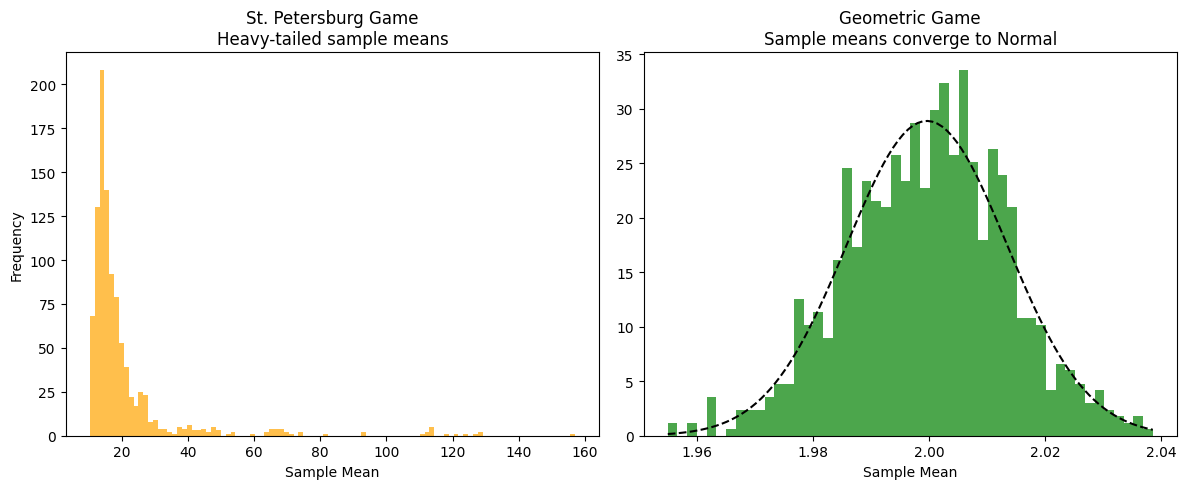

In [ ]:
n_samples = 10_000
n_repeats = 1_000

# draw samples from the St. Petersburg game
sp_data = [np.mean([st_petersburg_game() for _ in range(n_samples)]) for _ in range(n_repeats)]

# --- Geometric game ---
p = 0.5 ## How often the coin lands heads
# draw samples from a geometric distribution
geom_data = [np.mean(np.random.geometric(p, n_samples)) for _ in range(n_repeats)]

# --- Plot ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(sp_data, bins=100, color='orange', alpha=0.7)
plt.title("St. Petersburg Game\nHeavy-tailed sample means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(geom_data, bins=50, color='green', alpha=0.7, density=True)
x = np.linspace(min(geom_data), max(geom_data), 100)
plt.plot(x, 1/(np.sqrt(2*np.var(geom_data)*np.pi)) * np.exp(-(x - np.mean(geom_data))**2 / (2*np.var(geom_data))), color='black', linestyle='--')
plt.title("Geometric Game\nSample means converge to Normal")
plt.xlabel("Sample Mean")

plt.tight_layout()
plt.show()

## The differences - **Tail Behavior**

- The **St. Petersburg game** has a **heavy-tailed distribution**. While the probability of getting a large payoff (e.g., £1024) is small, the corresponding **payout is enormous**, so these rare events have a **huge impact on the mean**.

$$
\mathbb{E}[X] = \sum_{n=1}^{\infty} \left(\frac{1}{2}\right)^n \cdot 2^n = \sum_{n=1}^{\infty} 1 = \infty
$$

- In contrast, a **geometric game** has payoffs that increase **linearly**, not exponentially. The expected value remains **finite**:

$$
\mathbb{E}[X] = \sum_{n=1}^{\infty} n \cdot (1-p)^{n-1} \cdot p = \frac{1}{p}
$$

So while both games rely on geometric-like probabilities, their **reward structures** drastically change the long-run behavior and convergence properties of their sample means.


# Simulating LLN and CLT in a Random Walk

This simulation demonstrates how the **Law of Large Numbers (LLN)** and the **Central Limit Theorem (CLT)** apply to a symmetric random walk, where each step is either +1 or -1 with equal probability.

Note that:
- According to LLN, the average position should converge to 0 as the number of steps increases.
- According to CLT, for each walk, the final position, scaled by $ \sqrt{N}$, should form a normal distribution for large number of independent random walks.

Does $ W_n $ converge in distribution to a normal distribution? True


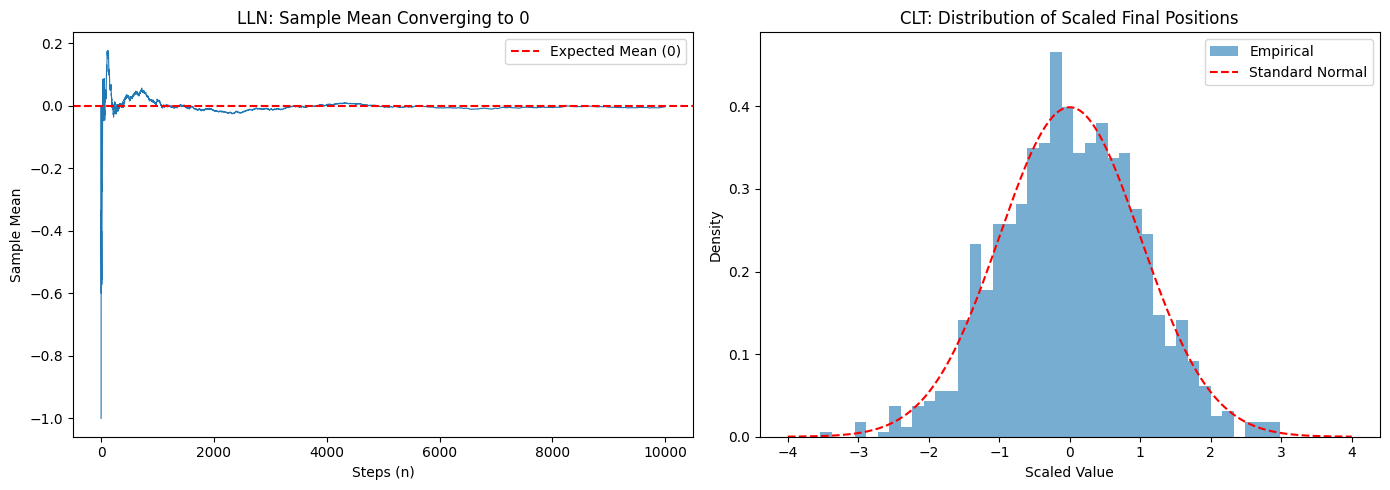

In [ ]:
# Increase number of steps
n = 10000
np.random.seed(42)  # For reproducibility
steps = np.random.choice([-1, 1], size=n)
walk = np.cumsum(steps)

# LLN: Sample mean should converge to 0
sample_means = walk / np.arange(1, n + 1)

# CLT: Scaled walk should converge in distribution to normal
scaled_walk = walk / np.sqrt(np.arange(1, n + 1))

# Plot sample mean convergence (LLN) - 1 path only
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(sample_means, lw=0.8)
plt.axhline(0, color='red', linestyle='--', label='Expected Mean (0)')
plt.title("LLN: Sample Mean Converging to 0")
plt.xlabel("Steps (n)")
plt.ylabel("Sample Mean")
plt.legend()

# Plot histogram of final scaled values (CLT)
plt.subplot(1, 2, 2)
num_paths = 1000
final_scaled_positions = []

## Simulate multiple paths to visualize CLT
np.random.seed(42)  # For reproducibility
for _ in range(num_paths):
    steps = np.random.choice([-1, 1], size=n)
    walk = np.cumsum(steps)
    final_scaled_positions.append(walk[-1] / np.sqrt(n))  # scaled final position

print(f"Do the Random Walk Paths converge in distribution to a normal distribution? {np.allclose(np.mean(final_scaled_positions), 0, atol=0.1) and np.std(final_scaled_positions) < 1.5}")

plt.hist(final_scaled_positions, bins=40, density=True, alpha=0.6, label="Empirical")
x = np.linspace(-4, 4, 200)
plt.plot(x, 1/np.sqrt(2*np.pi)*np.exp(-x**2/2), 'r--', label="Standard Normal")
plt.title("CLT: Distribution of Scaled Final Positions")
plt.xlabel("Scaled Value")
plt.ylabel("Density")
plt.legend()

plt.tight_layout()
plt.show()

# Monte Carlo Integration

The goal is to estimate the integral 

$$ 
 \int_0^1 \sqrt{1 - x^2} dx.
$$

This is $1/4$ of the unit cirlce and we know the actual integral is $\pi/4 \approx 0.7854 $.

Monte Carlo INtegral Estimate: 0.79024
True Value: 0.78540
Absolute Error: 4.84507e-03


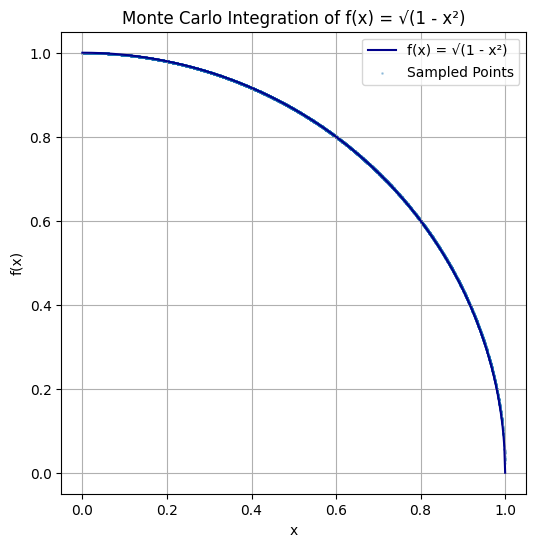

In [7]:
# Function to integrate
def f(x):
    return np.sqrt(1 - x**2)

# Monte Carlo parameters
n_samples = 10000
np.random.seed(42)  # For reproducibility

# Sample uniformly from [0, 1]
x_samples = np.random.uniform(0, 1, size=n_samples)
y_samples = f(x_samples)

# Estimate the integral as the average value of f(x) over [0, 1]
estimate = np.mean(y_samples)
true_value = np.pi / 4

print(f"Monte Carlo INtegral Estimate: {estimate:.5f}")
print(f"True Value: {true_value:.5f}")
print(f"Absolute Error: {abs(estimate - true_value):.5e}")

# Visualize samples
plt.figure(figsize=(6, 6))
plt.plot(np.linspace(0, 1, 500), f(np.linspace(0, 1, 500)), 'darkblue', label='f(x) = √(1 - x²)')
plt.scatter(x_samples, y_samples, s=1, alpha=0.3, label='Sampled Points')
plt.title("Monte Carlo Integration of f(x) = √(1 - x²)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.show()


# Estimating an Expectation with MCMC

In this example, we use **Metropolis-Hastings**, a popular Markov Chain Monte Carlo (MCMC) method, to sample from the standard normal distribution.

How it works:
- Define a target density (standard normal).
- Simulate a Markov chain where each new sample is *proposed* from a normal distribution centered at the *current* state.
- The *proposed* state is **accepted** with a probability based on the Metropolis acceptance ratio.

Then 
- According to the LLN, the sample average of a function of the samples will converge to the expected value under the target distribution as the number of samples increases.
- According to the CLT, under certain conditions, the scaled error of the sample mean will converge in distribution to a normal distribution. This means that we can construct confidence intervals for $ \mathbb{E}[X]$.  

Estimated E[X] ≈ 0.0453
95% CI for E[X]: [0.02459364 0.06594331]


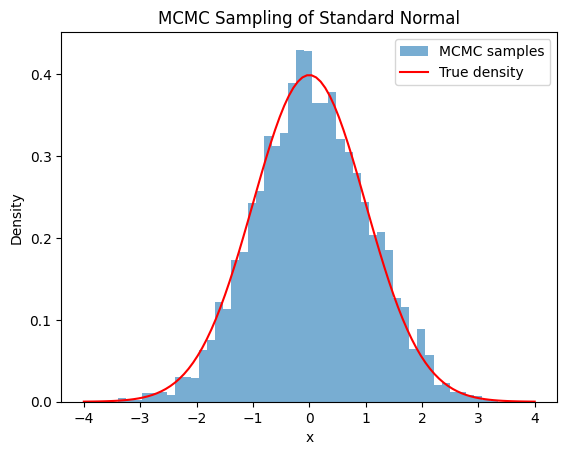

In [2]:
# Target: Standard normal distribution
def target_density(x):
    return norm.pdf(x)

# Proposal: Normal(x_current, 1)
def metropolis_sampler(n_samples, initial=0.0):
    samples = [initial]
    for _ in range(n_samples - 1):
        current = samples[-1]
        proposal = np.random.normal(current, 1.0)
        acceptance_ratio = target_density(proposal) / target_density(current)
        if np.random.rand() < acceptance_ratio:
            samples.append(proposal)
        else:
            samples.append(current)
    return np.array(samples)

# MCMC sampling using Metropolis-Hastings algorithm
np.random.seed(42)  # For reproducibility
n = 10000
samples = metropolis_sampler(n)
burn_in = 1000
samples = samples[burn_in:]  # Remove burn-in

# Estimate expectation using LLN
estimate = np.mean(samples)
print(f"Estimated E[X] ≈ {estimate:.4f}")

# Estimate variance for CLT-based confidence interval
stderr = np.std(samples) / np.sqrt(len(samples))
ci = np.array([estimate - 1.96 * stderr, estimate + 1.96 * stderr])
print(f"95% CI for E[X]: {ci}")

# Plot histogram and true density
x = np.linspace(-4, 4, 100)
plt.hist(samples, bins=50, density=True, alpha=0.6, label='MCMC samples')
plt.plot(x, norm.pdf(x), 'r-', label='True density')
plt.title("MCMC Sampling of Standard Normal")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()


# SGD on a Sample Quadratic Loss

The following code demonstrates Stochastic Gradient Descent (SGD) applied to a simple convex function:

$$ f(\theta) = \frac{1}{2}(\theta - 3 )^2, $$

which we know has a **true minimum** at $\theta = 3$.

Aim: minimise $f(\theta)$ using SGD.

Method: 
Obtain the derivative (gradient) $ f' (\theta) = \theta - 3 $. Iteratively
- Compute a noisy estimate of the gradient by adding Gaussian noise.
- and update the parameter $ \theta_{n+1} = \theta_{n} - \eta f' (\theta)  $


According to LLN, the noisy updates average out, over many iterations, hence the estimate $\hat{\theta}$ converges towards the true minimum $\theta$.

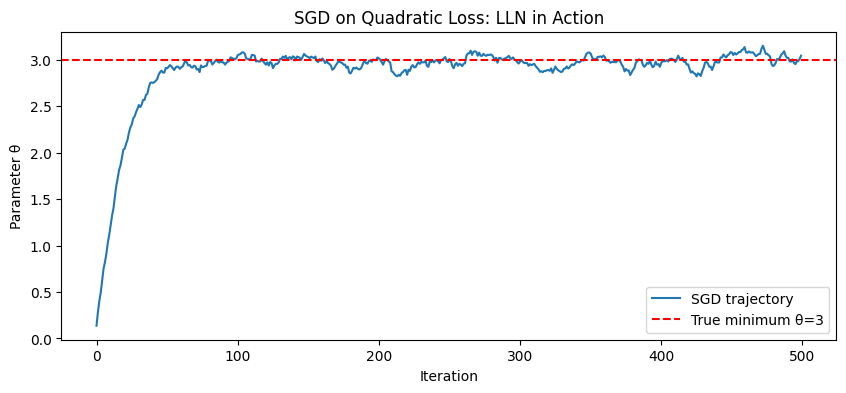

In [23]:
# True function: f(θ) = 0.5 * (θ - 3)^2
# Gradient: f'(θ) = θ - 3

np.random.seed(42)
n_steps = 500
theta = 0.0
theta_history = []
eta = 0.05

for step in range(n_steps):
    noise = np.random.normal(0, 0.5)  # Add stochastic noise to gradient
    grad_estimate = (theta - 3) + noise
    theta = theta - eta * grad_estimate
    theta_history.append(theta)

theta_history = np.array(theta_history)

# LLN: convergence of noisy average to true minimum
plt.figure(figsize=(10, 4))
plt.plot(theta_history, label='SGD trajectory')
plt.axhline(3, color='red', linestyle='--', label='True minimum θ=3')
plt.xlabel("Iteration")
plt.ylabel("Parameter θ")
plt.title("SGD on Quadratic Loss: LLN in Action")
plt.legend()
plt.show()
